In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
from sklearn.datasets import fetch_openml

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1, return_X_y=True)
X, y = mnist
X = X.astype(np.float32) / 255.0  # Normalize and convert to float32
y = y.astype(int)

we are going to compare the accuracies of the model given various test splits, as shown below

In [6]:
test_sizes = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
accuracies = []

knn = KNeighborsClassifier() 

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    
    knn.fit(X_train, y_train)
    predictions = knn.predict(X_test)
    
    accuracy = accuracy_score(y_test, predictions)
    accuracies.append(accuracy)
    
    # Print the detailed analysis for each split
    matrix = confusion_matrix(y_test, predictions)
    report = classification_report(y_test, predictions)
    
    print(f"Test Size: {test_size} \nAccuracy: {accuracy:.6%}")
    print(f"Confusion Matrix:\n{matrix}")
    print(f'Classification Report:\n{report}\n')


Test Size: 0.2 
Accuracy: 96.935714%
Confusion Matrix:
[[1376    0    1    0    0    2    8    0    0    0]
 [   0 1576    2    1    0    0    0    1    0    0]
 [   9   13 1387    3    3    0    2   18    7    1]
 [   1    4   17 1376    1   13    0    8   12    3]
 [   1    7    0    0 1309    0    2    4    1   26]
 [   3    3    2   13    2 1179   18    3    2    6]
 [   6    2    1    0    4    8 1365    0    1    0]
 [   0   16    5    0    2    0    0 1420    1   14]
 [   3   20    3   16    4   28    5    3 1270   16]
 [   3    2    2   12   12    1    1   13    2 1313]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1387
           1       0.96      1.00      0.98      1580
           2       0.98      0.96      0.97      1443
           3       0.97      0.96      0.96      1435
           4       0.98      0.97      0.97      1350
           5       0.96      0.96      0.96      1231
           6

next we tabulate the results to visualize the data:

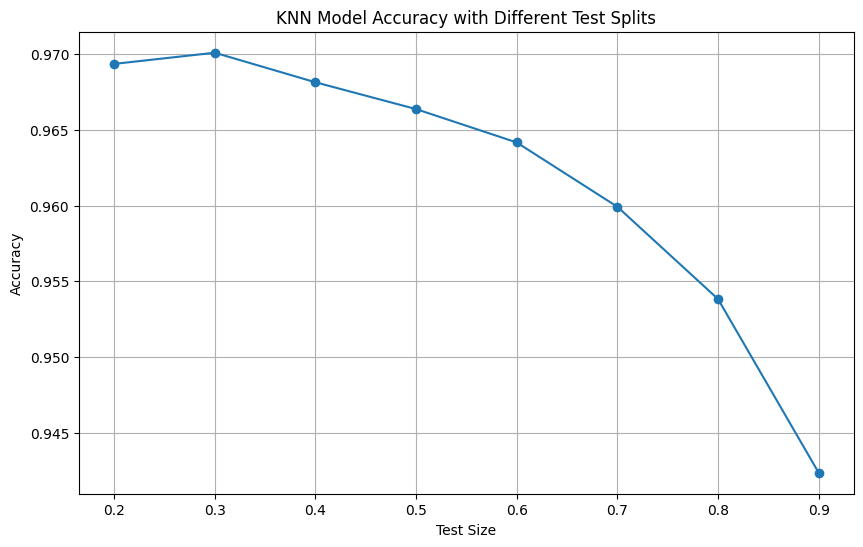

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(test_sizes, accuracies, marker='o')
plt.title('KNN Model Accuracy with Different Test Splits')
plt.xlabel('Test Size')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()